In [212]:
import pandas as pd

dataset =pd.read_csv("healthcare-dataset-stroke-data.csv")

print("Total no of records are", 
      len(dataset))



# total.isnull().sum() will return all the null values column wise and adding a sum() again will sum it up and get us 
# the final count

print("The count of null values are " ,dataset.isnull().sum().sum())




Total no of records are 5110
The count of null values are  201


In [213]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [214]:
# mean median mode of the numerical columns 

print(dataset.mean(numeric_only=True))

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64


In [215]:
print(dataset.median(numeric_only=True))

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64


In [216]:
print(dataset.std(numeric_only=True))

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64


In [217]:
if dataset['bmi'].isnull().values.any():
    print ("The percent of null values are " , ( dataset.isnull().sum().sum()/len(dataset) ) * 100 )

The percent of null values are  3.9334637964774952


In [218]:
dataset = dataset.fillna(dataset['bmi'].median())

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

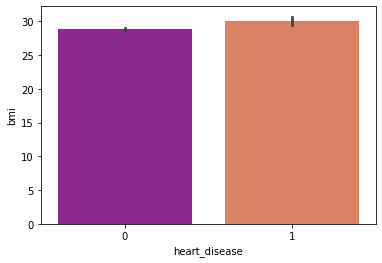

In [219]:
# this graph shows that the average bmi of people eith heart disease is more than the people without heart disease 
# considering the 1 as heart disease and 0 as normal person

import seaborn as sns

sns.barplot(x ='heart_disease', y ='bmi', data = dataset,  
            palette ='plasma')

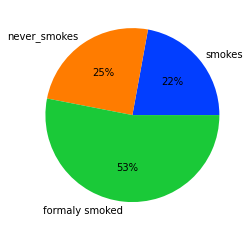

In [220]:
smokes = dataset['smoking_status'].value_counts()['smokes']
never_smokes = dataset['smoking_status'].value_counts()['formerly smoked']
formaly_smokes = dataset['smoking_status'].value_counts()['never smoked']

data = [smokes,never_smokes,formaly_smokes]
labels = ['smokes', 'never_smokes', 'formaly smoked']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

<AxesSubplot:xlabel='work_type', ylabel='bmi'>

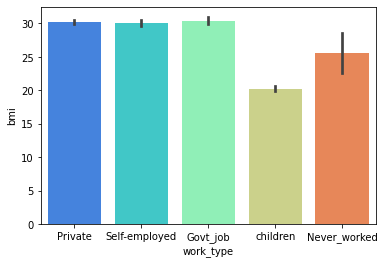

In [221]:
# this shows the children has the least bmi as compared to others

sns.barplot(x='work_type',y='bmi',data=dataset, palette='rainbow')

In [222]:
import numpy as np

outliers=[]

def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)   




detect_outlier(dataset['bmi'])
dataset = dataset[dataset.bmi.isin(outliers) == False]
outliers=[]
detect_outlier(dataset['avg_glucose_level'])
dataset = dataset[dataset.avg_glucose_level.isin(outliers) == False]




In [223]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [224]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()

dataset[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']] = scaler.fit_transform(dataset[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']])

dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.934478,0.632212,formerly smoked,1.0
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.791913,0.427885,never smoked,1.0
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.273501,0.533654,never smoked,1.0
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.625121,0.579327,smokes,1.0
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.640681,0.329327,never smoked,1.0


In [225]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['ever_married'] = label_encoder.fit_transform(dataset['ever_married'])
dataset['work_type'] = label_encoder.fit_transform(dataset['work_type'])
dataset['Residence_type'] = label_encoder.fit_transform(dataset['Residence_type'])
dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status'])

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1,0.816895,0.0,1.0,1,2,1,0.934478,0.632212,1,1.0
1,0.708205,0,0.743652,0.0,0.0,1,3,0,0.791913,0.427885,2,1.0
2,0.426015,1,0.975586,0.0,1.0,1,2,0,0.273501,0.533654,2,1.0
3,0.824928,0,0.597168,0.0,0.0,1,2,1,0.625121,0.579327,3,1.0
4,0.021929,0,0.963379,1.0,0.0,1,3,0,0.640681,0.329327,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0,0.975586,1.0,0.0,1,2,1,0.154140,0.427885,2,0.0
5106,0.614850,0,0.987793,0.0,0.0,1,3,1,0.377302,0.713942,2,0.0
5107,0.269730,0,0.426270,0.0,0.0,1,3,0,0.150048,0.487981,2,0.0
5108,0.514278,1,0.621582,0.0,0.0,1,2,0,0.598525,0.367788,1,0.0
